# Checking the rigorous RWA: population dynamics and spectra

In [3]:
import time

from qutip import ket, mesolve, qeye, tensor, thermal_dm, destroy, steadystate
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt

import UD_liouv as RC
import driving_liouv as EM
import exact_IB as exact
import scipy as sp

import phonon_weak_coupling as WC
from utils import J_overdamped, beta_f, J_underdamped, J_minimal_hard, J_multipolar, ground_and_excited_states, initialise_TLS

import spectra_functions as SF

reload(RC)
reload(EM)
reload(exact)
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

# Things that will always be true
ev_to_inv_cm = 8065.5
inv_ps_to_inv_cm = 5.309
G = ket([0])
E = ket([1])
sigma = G*E.dag() # Definition of a sigma_- operator.
J_EM = J_multipolar#EM.J_minimal

## Absorption spectra
This remains to be done. I need to look over the calculation again but it's not really on my agenda right now...

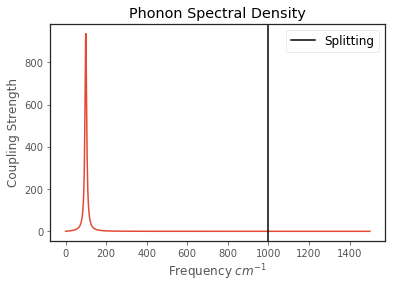

w_RC=100.0 | TLS splitting = 1000 | RC-res. coupling=0.02 | TLS-RC coupling=122.47 | Gamma_RC=10.00 | alpha_ph=95.49 | N=10 |
Completed response function calculations for Naive in 0.198437929153 seconds.
Completed response function calculations for Full in 0.210785150528 seconds.


In [144]:
reload(SF)
alpha_prop = 0.3
w0_prop = 0.1
eps = 1000
Gamma = eps*0.01
Gamma_EM = eps*0.001
timelist, S1s, freqs, specs = SF.absorption_spectra(alpha_prop, eps, Gamma, 
                                                    w0_prop*eps, T_ph=300., T_EM=0.,
                                                    Gamma_EM=Gamma_EM, N=10,
                                                    end_T_mult=0.1, rotating=False,
                                                    T_increments=2000, nsteps=2000,
                                                    method='adams', 
                                                    order=12, final_t = 2.)


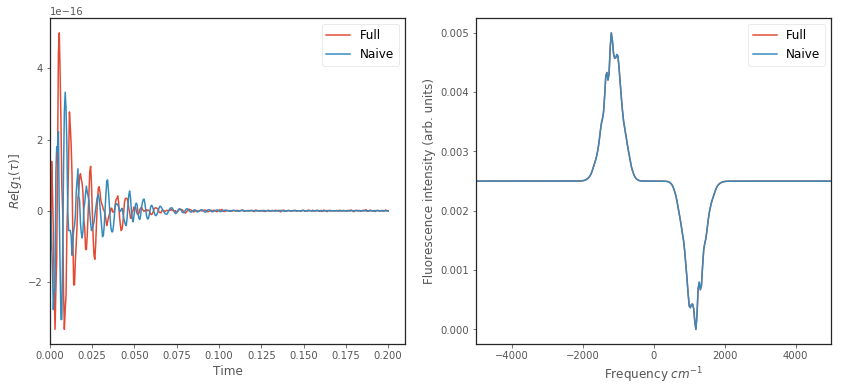

In [145]:

def plot_absorption_spectra(timelist, S1s, freqs, specs,
                freq_window=1000., time_window=0.1):
    plt.close('all')
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    label = ['Full', 'Naive']
    ls = ['solid', 'solid']
    time_window = float(time_window)
    for i, spec in enumerate(specs):
        #print ((-1)**i)
        S1  = ((-1)**i)*np.array(S1s[i])
        freq = freqs[i]
        ax1.plot(timelist, S1.real, 
                 label=label[i], linestyle=ls[i])
        ax2.plot(freqs[i], specs[i], 
                 label=label[i], linestyle=ls[i])
    ax1.set_xlim(0, time_window)
    
    #ax2.axvline(eps, linestyle='dashed',color='k', alpha=0.4)
    ax2.set_xlim(-freq_window, freq_window)
    
    ax1.set_ylabel(r"$Re[g_1(\tau)]$") # coherence
    #ax1.set_ylabel(r"$Im[g_1(\tau)]$") # coherence
    ax1.set_xlabel(r"Time")
    ax2.set_xlabel(r"Frequency $cm^{-1}$")
    ax2.set_ylabel(r"Fluorescence intensity (arb. units)")
    ax1.legend()
    ax2.legend()
    plt.show()

plot_absorption_spectra(timelist, S1s, freqs, specs,
                freq_window=5000., time_window=0.21)